## Why need Churn Prediction ?
Karena saat ini,kemungkinan pelanggan untuk berganti service provider sangat tinggi dengan segala kemudahan yg ada dan ini menjadi pekerjaan rumah yg cukup sulit bagi  sevice provider untuk mempertahan kan pelanggan nya.
Hal ini tentunya sangat berdampak besar bagi perusahaan service provider. Karena budgeting untuk pelanggan baru pastinya lebih besar dibanding kan dengan budgeting untuk memaintain pelanggan yg sudah ada.
oleh karena itu perusahaan service provider memerlukan tools yang mampu memprediksi kemungkinan pelanggan yg akan churn atau berganti ke srvice provider lain


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [17]:
# import data
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


### Data Understanding

In [18]:
df.shape

(4930, 11)

Terdapat 11 Kolom & 4930 barisa data

Features
-	Dependents: Apakah custome memiliki tanggungan atau tidak
-	Tenure: Durasi pelanggan menjadi customer
-	OnlineSecurity: Apakah pelanggan menggunakan layanan pengamanan daring (online security) atau tidak
-	OnlineBackup: Apakah pelanggan menggunakan layanan online backup atau tidak
-	InternetService: Jenis layanan internet yang digunakan oleh pelanggan
-	DeviceProtection: Apakah pelanggan menggunakan layanan device protection atau tidak
-	TechSupport: Apakah pelanggan menggunakan layanan tech support atau tidak
-	Contract: Tipe kontrak berdasarkan durasi penggunaan layanan
-	PaperlessBilling: Apakah tagihan menggunakan kertas atau tidak
-	MonthlyCharges: Nominal tagihan bulanan pelanggan
-	Churn: Apakah pelanggan churn atau tidak


In [19]:
# Describe data numeric & object
display(df.describe().transpose())
df.describe(include='object')

,count,mean,std,min,25%,50%,75%,max
tenure,4930.0,32.401217,24.501193,0.0,9.00,29.00,55.00,72.00
MonthlyCharges,4930.0,64.883032,29.923960,18.8,37.05,70.35,89.85,118.65


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


In [20]:
# Cek datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [21]:
# Jumlah data & nilai unik tiap kolom
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabelunik = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabelunik

,Column Name,Number of Unique,Unique Values
0,Dependents,2,"[No, Yes]"
1,tenure,73,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]"
2,OnlineSecurity,3,"[No, No internet service, Yes]"
3,OnlineBackup,3,"[No, No internet service, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[No, No internet service, Yes]"
6,TechSupport,3,"[No, No internet service, Yes]"
7,Contract,3,"[Month-to-month, One year, Two year]"
8,PaperlessBilling,2,"[No, Yes]"
9,MonthlyCharges,1422,"[18.8, 18.85, 18.9, 18.95, 19.0, 19.05, 19.1, 19.15, 19.2, 19.25, 19.3, 19.35, 19.4, 19.45, 19.5, 19.55, 19.6, 19.65, 19.7, 19.75, 19.8, 19.85, 19.9, 19.95, 20.0, 20.05, 20.1, 20.15, 20.2, 20.25, 20.3, 20.35, 20.4, 20.45, 20.5, 20.55, 20.6, 20.65, 20.7, 20.75, 20.8, 20.85, 20.9, 20.95, 21.0, 21.05, 21.1, 21.15, 21.2, 21.3, 21.45, 22.95, 23.3, 23.45, 23.55, 23.6, 23.65, 23.75, 23.8, 23.85, 23.9, 23.95, 24.0, 24.05, 24.1, 24.15, 24.2, 24.25, 24.3, 24.35, 24.4, 24.45, 24.5, 24.55, 24.6, 24.65, 24.7, 24.75, 24.8, 24.85, 24.9, 24.95, 25.0, 25.05, 25.1, 25.15, 25.2, 25.25, 25.3, 25.35, 25.4, 25.45, 25.5, 25.55, 25.6, 25.7, 25.75, 25.8, 25.85, 25.9, ...]"


### Data PreProcessing

In [22]:
# Cek duplicate data
print('Jumlah data duplikat :', df.duplicated().sum())

Jumlah data duplikat : 77


In [23]:
# Drop duplicate data
len(df)-len(df.drop_duplicates())
df.drop_duplicates(inplace=True)
print('Baris data, Kolom :', df.shape)

Baris data, Kolom : (4853, 11)


In [24]:
# Cek Missing value
print(df.isna().sum())

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64


No Missing value

In [25]:
# Cek nilai "0" Pada kolom tenur
print('Jumlah baris data dengan "tenur = 0" :',df[df['tenure'] == 0].value_counts().sum())

Jumlah baris data dengan "tenur = 0" : 8


In [26]:
df[df['tenure'] == 0]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
82,Yes,0,No,Yes,DSL,Yes,Yes,Two year,No,73.35,No
325,Yes,0,Yes,No,DSL,Yes,Yes,Two year,Yes,52.55,No
1053,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.35,No
2017,Yes,0,Yes,Yes,DSL,Yes,No,Two year,No,80.85,No
2902,Yes,0,Yes,Yes,DSL,No,Yes,Two year,Yes,61.90,No
3410,Yes,0,Yes,Yes,DSL,Yes,Yes,Two year,No,56.05,No
4192,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.25,No
4441,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.85,No


Jika di lihat kolom contract, semua tenur = 0, contract = two years

In [27]:
# Cek nilai unik Nbr of tenur saat contract = two year
df[df['Contract'] == 'Two year']['tenure'].unique()

array([64, 72, 58, 71, 69, 55, 66, 70,  0, 67, 62, 51, 56, 52, 60, 63, 59,
       49, 35, 57, 65, 27, 54, 11, 46, 48, 40, 39, 31, 45, 22, 68, 43, 53,
        8, 14, 24, 30,  6, 47, 41, 61,  4, 19, 26, 33, 16, 44, 23, 18, 17,
       36, 34, 25, 12, 50, 20, 37, 42, 21, 13, 32,  9, 29,  3, 10,  7, 38,
       15,  1], dtype=int64)

Range nilai tenur pada jenis kontrak two year (24 bulan) dari 1-72. kembali ke definisi kolom tenur merupakan Durasi pelanggan menjadi customer suatu perusahaan service provider. Maka saat nilai Tenur = 0 kemungkinan besar ini adalah pelanggan baru. dan 8 baris data dengan nilai 0 ini tidak di ubah maupun di drop, data ini akan di ikut sertakan dalam pemprosesan data apa adanya

Outlier menggunakan boxplot untuk variable tenure & MonthlyCharges

Text(0.5, 1.0, "Grafik Boxplot untuk Variabel 'Tenure'")

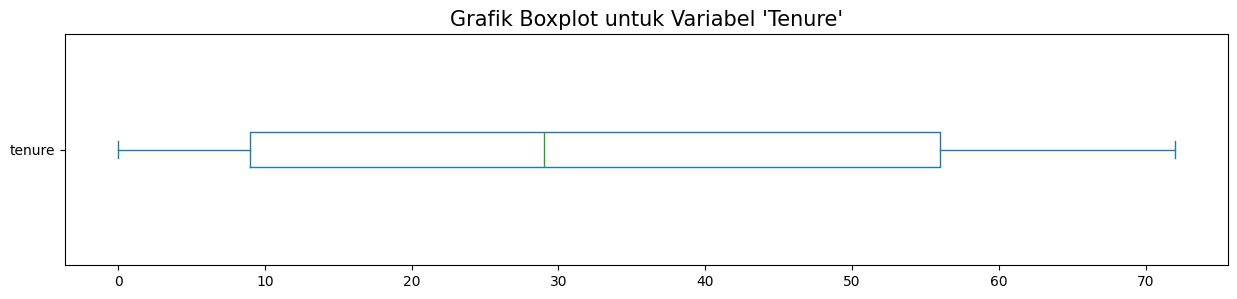

In [28]:
# Menegcek Outlier menggunakan boxplot untuk variable tenure
df.tenure.plot(kind='box', vert=False, figsize=(15,3)) 
plt.title("Grafik Boxplot untuk Variabel 'Tenure'", size = "15")

Text(0.5, 1.0, "Grafik Boxplot untuk Variabel 'MonthlyCharges'")

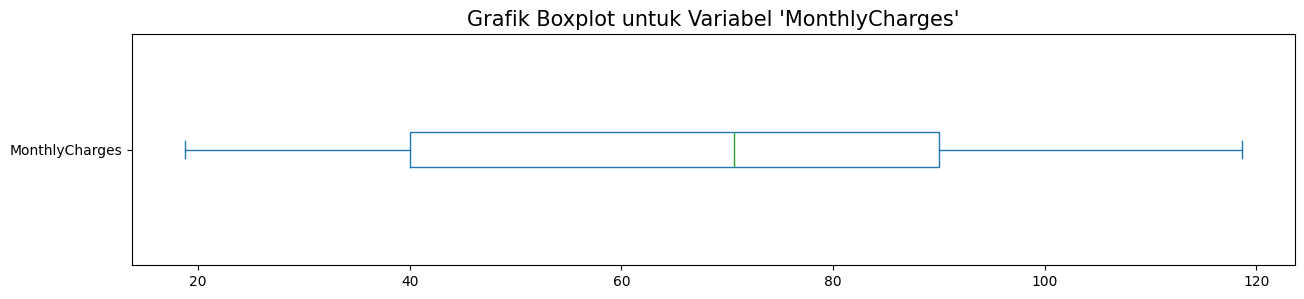

In [29]:
# Menegcek Outlier menggunakan boxplot untuk variable MonthlyCharges
df.MonthlyCharges.plot(kind='box', vert=False, figsize=(15,3)) 
plt.title("Grafik Boxplot untuk Variabel 'MonthlyCharges'", size = "15")

No Outlier di dataset ini

### Exploratory Data Analysis - EDA

### Univariate Analysis

Merupakan metode analisa untuk memeriksa distribusi, statistik deskriptif, dan karakteristik lain dari satu variabel tunggal. ada 3 variabel yg kita cek yaitu: Count of Churn, Count OF Interner Sevices & Distribusi Tenur

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14732\1277098309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(x = df["Churn"],palette="Purples")


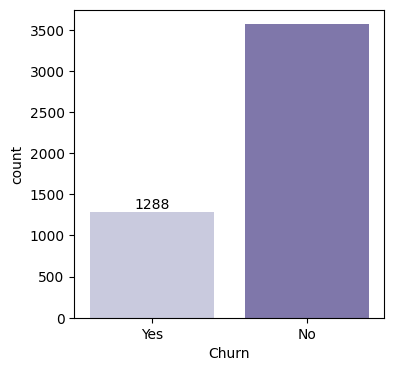

In [30]:
# Count Churn
plt.figure(figsize=(4,4))
ax = sb.countplot(x = df["Churn"],palette="Purples")
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14732\1306248045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(x = df["InternetService"],palette="Purples")


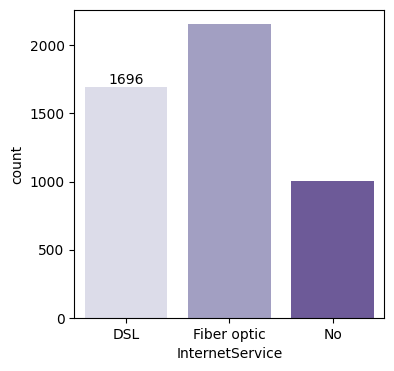

In [31]:
# Count Per InternetService
plt.figure(figsize=(4,4))
ax = sb.countplot(x = df["InternetService"],palette="Purples")
ax.bar_label(ax.containers[0])
plt.show()

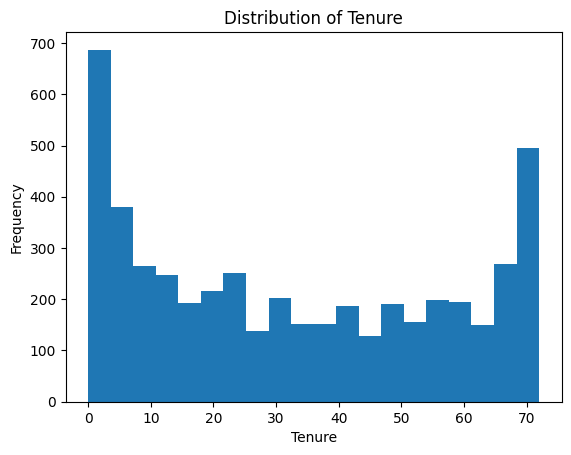

In [32]:
# Plot a histogram untuk distribusi tenur
plt.hist(df['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

### Multivariate Analysis

 Merupakan metode analisa untuk memeriksa hubungan antara dua atau lebih variabel

Total Churn 

In [33]:
# percentage churn
jmlchurn = df[df['Churn'] == 'Yes'].shape[0]
totaldata = df.shape[0]
churn_rate = (jmlchurn / totaldata) * 100
print("Pesentase churn secara keseluruhan : {:.2f}%".format(churn_rate))

Pesentase churn secara keseluruhan : 26.54%


Dalam data ini ada 26.54 % Customer yang Churn, selebihnya ada 73.46% Customer yang tidak churn

1. Korelasi antara Churn Rate dan Tenure

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14732\445288360.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby(tenure_range )['Churn'].value_counts(normalize=True).unstack()


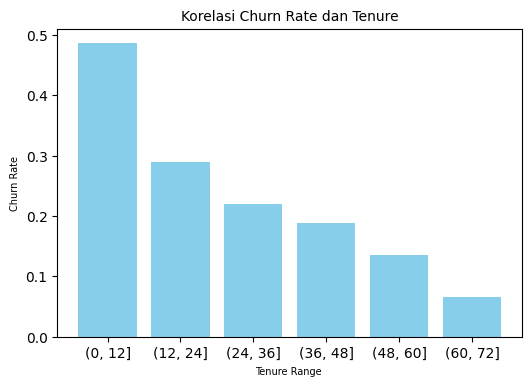

In [34]:
# Grouping tenure pertahun
tenure_range = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72])
churn_by_tenure = df.groupby(tenure_range )['Churn'].value_counts(normalize=True).unstack()
churn_rate_by_tenure = churn_by_tenure['Yes']

x = churn_rate_by_tenure.index.astype(str)
y = churn_rate_by_tenure.values

plt.figure(figsize=(6,4))
plt.bar(x, y, color= "skyblue")
plt.xlabel('Tenure Range ', fontsize = 7)
plt.ylabel('Churn Rate', fontsize = 7)
plt.title('Korelasi Churn Rate dan Tenure', fontsize = 10)
plt.show()

Churn rate tertinggi ada di range tenure 1 tahun, makin lama berlangganan kemungkinan churn nya makin kecil. 

2. Korelasi antara Churn Rate dan MonthlyCharges

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14732\3220138465.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_MonthlyCharges = df.groupby(MonthlyCharges_range)['Churn'].value_counts(normalize=True).unstack()


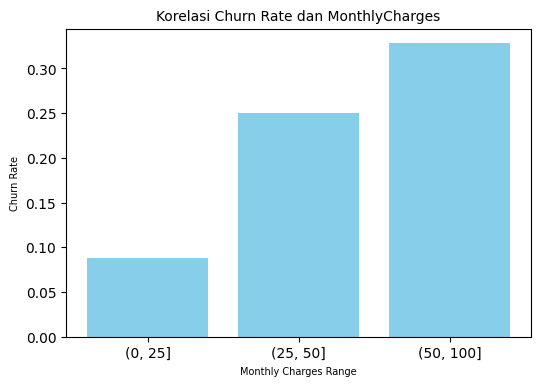

In [35]:
# Grouping MonthlyCharges
MonthlyCharges_range= pd.cut(df['MonthlyCharges'], bins=[0, 25, 50, 100])
churn_by_MonthlyCharges = df.groupby(MonthlyCharges_range)['Churn'].value_counts(normalize=True).unstack()
churn_rate_by_MonthlyCharges = churn_by_MonthlyCharges['Yes']

x = churn_rate_by_MonthlyCharges.index.astype(str)
y = churn_rate_by_MonthlyCharges.values

plt.figure(figsize=(6,4))
plt.bar(x, y,color= "skyblue")
plt.xlabel('Monthly Charges Range', fontsize = 7)
plt.ylabel('Churn Rate', fontsize = 7)
plt.title('Korelasi Churn Rate dan MonthlyCharges', fontsize = 10)
plt.show()

MonthlyCharges yg tingggi maka kecenderungan churn rate nya jg makin tinggi

3. Korelasi antara Churn Rate dan internet_service

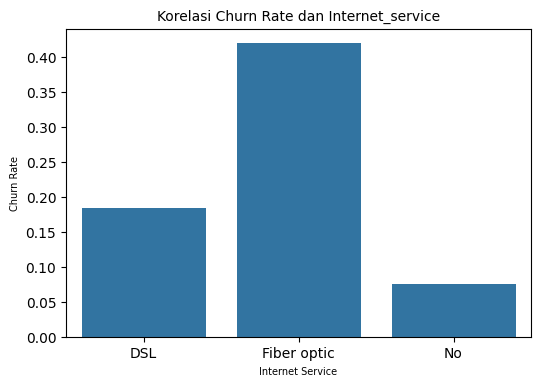

In [36]:
# Churt rate per internet_service
churn_by_internet_service = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
churn_by_internet_service = churn_by_internet_service.loc[:, 'Yes']

plt.figure(figsize=(6, 4))
sb.barplot(x=churn_by_internet_service.index, y=churn_by_internet_service.values)
plt.xlabel('Internet Service', fontsize = 7)
plt.ylabel('Churn Rate', fontsize = 7)
plt.title('Korelasi Churn Rate dan Internet_service', fontsize = 10)
plt.show()

Customer layanan Fiber optik memiliki churn rate paling tinggi dibandingkan dengan DSL dan No (tdk menggunakan layanan internet service). Hal ini biasanya terjadi karena harga layanan fiber optik yg cenderung tinggi, sehingga customer akan lebih memilih layanan yg lebih murah. selain itu jg kualitas jairingan fiber optik yg jika terdapat gangguan memerukan waktu penanganan yang tidak singkat. ke dua hal ini yg bisa menjadi faktor tingginya churn rate di layanan fiber optik

4. Korelasi antara Churn Rate dan PaperlessBilling

In [37]:
churn_by_paperless = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()
churn_by_paperless.transpose()

PaperlessBilling,No,Yes
Churn,,
No,0.835581,0.668034
Yes,0.164419,0.331966


Customer dengan PaperlessBilling memiliki nilai churn lebih tinggi di bandingkan dengan customer no PaperlessBilling

Feature Engineering

Menambahkan 1 kolom TotalCharges = tenure x MonthlyCharges

In [39]:
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,TotalCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes,656.1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No,1157.1
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes,3062.4
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No,5014.8
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No,70.8


Feature Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in df.columns:
	if df[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	df[column] = LabelEncoder().fit_transform(df[column])
print(df.describe())

        Dependents       tenure  OnlineSecurity  OnlineBackup  \
count  4853.000000  4853.000000     4853.000000   4853.000000   
mean      0.303524    32.679992        0.796002      0.908098   
std       0.459827    24.395554        0.867101      0.886025   
min       0.000000     0.000000        0.000000      0.000000   
25%       0.000000     9.000000        0.000000      0.000000   
50%       0.000000    29.000000        1.000000      1.000000   
75%       1.000000    56.000000        2.000000      2.000000   
max       1.000000    72.000000        2.000000      2.000000   

       InternetService  DeviceProtection  TechSupport     Contract  \
count      4853.000000       4853.000000  4853.000000  4853.000000   
mean          0.857202          0.902328     0.786936     0.686380   
std           0.732031          0.885407     0.864917     0.828525   
min           0.000000          0.000000     0.000000     0.000000   
25%           0.000000          0.000000     0.000000     0.0000

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14732\2746137372.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number: continue
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14732\2746137372.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number: continue
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14732\2746137372.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number: continue
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14732\2746137372.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly co

Splitting Dataset

Dataset di bagi menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y). menggunakan train_test_split() untuk membagi data tersebut. menggunakan value_counts untuk mengecek apakah pembagian sudah sama proporsinya dan hasil spliting data menjadi x_train, y_train, x_test & y_test

In [41]:
from sklearn.model_selection import train_test_split
# Predictor dan target
X = df.drop('Churn', axis = 1)
y = df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (3397, 11) , sedangkan Jumlah baris dan kolom dari y_train adalah: (3397,)
Prosentase Churn di data Training adalah:
Churn
0    0.739476
1    0.260524
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (1456, 11) , sedangkan Jumlah baris dan kolom dari y_test adalah: (1456,)
Prosentase Churn di data Testing adalah:
Churn
0    0.723214
1    0.276786
Name: proportion, dtype: float64


Note : Proses encoding ini mengubah value dari data yang masih berbentuk string menjadi numeric, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Proses selanjutnya di data splitting, dimana data di bagi menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom churn juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.

### Modeling

Modelling : Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performansi Model Training - Menampilkan Metrics

Setelah kita membuat modelnya, di lanjutkan dengan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training

In [43]:
from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2512
           1       0.64      0.57      0.60       885

    accuracy                           0.81      3397
   macro avg       0.75      0.73      0.74      3397
weighted avg       0.80      0.81      0.80      3397



Performansi Model Training - Menampilkan Plots

Setelah mendapatkan hasil classification report pada tahap sebelumnya, sekarang kita akan melakukan visualisasi

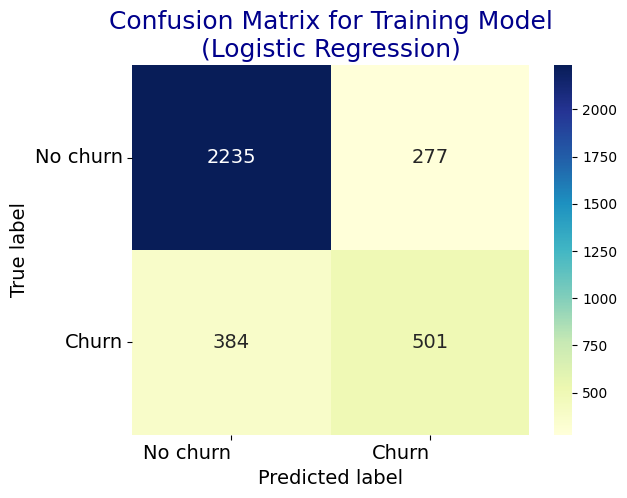

In [45]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Performansi Data Testing - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing

In [46]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1053
           1       0.63      0.53      0.58       403

    accuracy                           0.78      1456
   macro avg       0.73      0.71      0.72      1456
weighted avg       0.78      0.78      0.78      1456



Performansi Data Testing - Menampilkan Plots

Setelah menampilkan metrics pada tahap sebelumnya, sekarang kita akan melakukan visualisasi dari metrics yang sudah dihasilkan sebelumnya

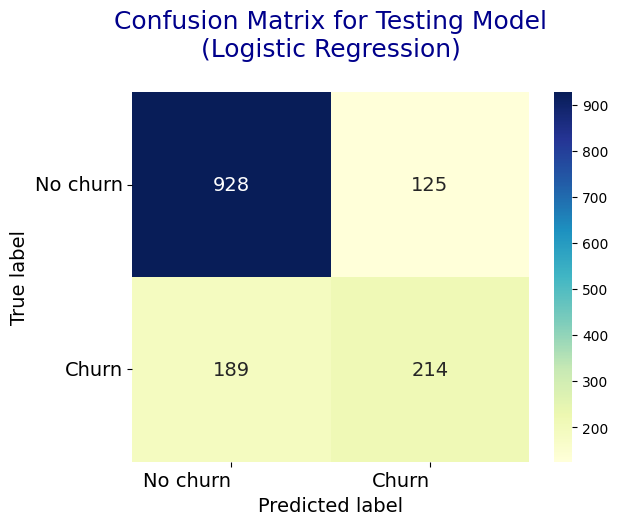

In [47]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)),('No churn','Churn'),('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Note - Logistic Regression :
1. Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 81%, dengan detil tebakan churn yang sebenernya benar churn adalah 501, tebakan tidak churn yang sebenernya tidak churn adalah 2235, tebakan tidak churn yang sebenernya benar churn adalah 384 dan tebakan churn yang sebenernya tidak churn adalah 277

2. Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 214, tebakan tidak churn yang sebenernya tidak churn adalah 928, tebakan tidak churn yang sebenernya benar churn adalah 189 dan tebakan churn yang sebenernya tidak churn adalah 125

Modelling : Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


Performansi Data Training - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training

In [49]:
from sklearn.metrics import classification_report
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2512
           1       0.99      0.99      0.99       885

    accuracy                           0.99      3397
   macro avg       0.99      0.99      0.99      3397
weighted avg       0.99      0.99      0.99      3397



Performansi Data Training - Menampilkan Plots

Setelah menampilkan metrics pada tahap sebelumnya, selanjutnya kita akan melakukan visualisasi terhadap metrics tersebut

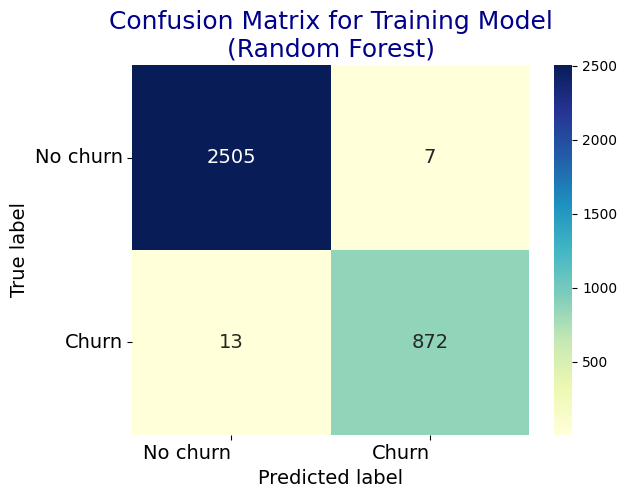

In [50]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Performansi Data Testing - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing

In [51]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1053
           1       0.63      0.53      0.58       403

    accuracy                           0.78      1456
   macro avg       0.73      0.71      0.72      1456
weighted avg       0.78      0.78      0.78      1456



Performansi Data Testing - Menampilkan Plots

Tampilkan visualisasi dari hasil metrics yang sudah diperoleh pada tahap sebelumnya

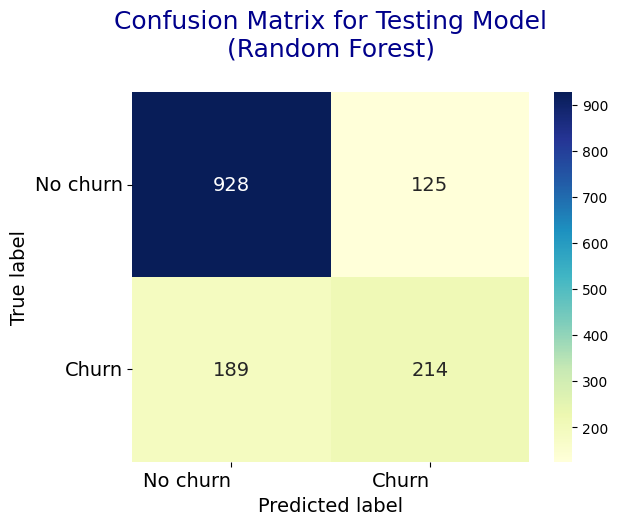

In [52]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Note - Random Forest :

1. Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 99%, dengan detil tebakan churn yang sebenernya benar churn adalah 872, tebakan tidak churn yang sebenernya tidak churn adalah 2507, tebakan tidak churn yang sebenernya benar churn adalah 13 dan tebakan churn yang sebenernya tidak churn adalah 5

2. Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 214, tebakan tidak churn yang sebenernya tidak churn adalah 928, tebakan tidak churn yang sebenernya benar churn adalah 189 dan tebakan churn yang sebenernya tidak churn adalah 214.

Modelling : Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


Perfomansi Model Data Training - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training

In [54]:
from sklearn.metrics import classification_report
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2512
           1       0.75      0.59      0.66       885

    accuracy                           0.84      3397
   macro avg       0.81      0.76      0.78      3397
weighted avg       0.84      0.84      0.83      3397



Perfomansi Model Data Training - Menampilkan Plots

Tampilkan visualisasi dari metrics yang sudah dihasilkan sebelumnya

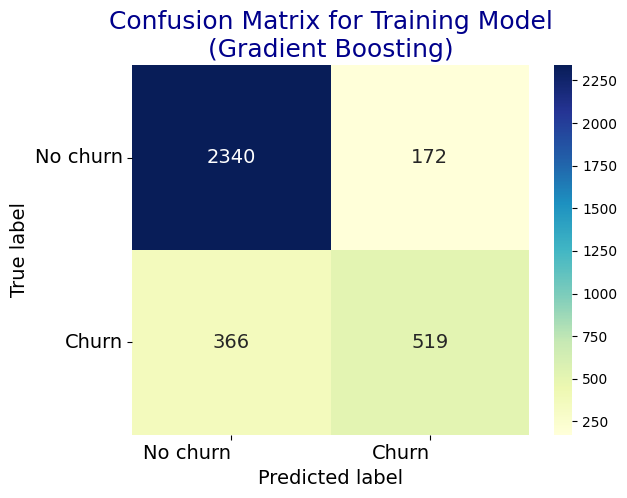

In [55]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Performansi Model Data Testing - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing

In [56]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1053
           1       0.63      0.53      0.58       403

    accuracy                           0.78      1456
   macro avg       0.73      0.71      0.72      1456
weighted avg       0.78      0.78      0.78      1456



Performansi Model Data Testing - Menampilkan Plots

Buatlah visualisasi dari metrics yang sudah dihasilkan sebelumnya

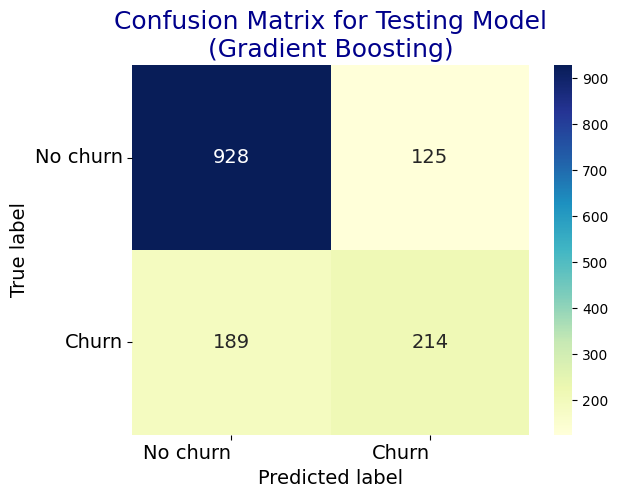

In [57]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Note - Gradient Boosting :

1. Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 84%, dengan detil tebakan churn yang sebenernya benar churn adalah 519, tebakan tidak churn yang sebenernya tidak churn adalah 3240, tebakan tidak churn yang sebenernya benar churn adalah 366 dan tebakan churn yang sebenernya tidak churn adalah 519

2. Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 214, tebakan tidak churn yang sebenernya tidak churn adalah 928, tebakan tidak churn yang sebenernya benar churn adalah 189 dan tebakan churn yang sebenernya tidak churn adalah 125.

### Kesimpulan & Rekomendasi

Kesimpulan

Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 99%, akurasi testing 78%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya

Limitation:
- Baris data di kisaran 5000
- Banyak variable yg di uji tidak lebih dari 10 variable (Numerik / Kategorical)
- Untuk data Churn batasan tenur maksimal di kisaran 72 bulan


Rekomendasi
1. Membuat Customer Loyalty Program yang mendorong pelanggan agar tetap bertahan dan memiliki waktu tenure yang panjang. Bentuk program bisa berupa pemberian reward yang besarannya disesuaikan dengan masa tenure. Semakin panjang tenure, semakin besar reward yang bisa didapat, sehingga mendorong pelanggan untuk memiliki tenure yang lebih panjang.
2. Memberikan diskon/potongan harga MonthlyCharges bagi pegawai yang terindikasi/diprediksi akan churn, khususnya untuk pelanggan yang memiliki MonthlyChargesyang tinggi.
3. Menyediakan layangan InternetService Fiber optic dengan harga yang lebih murah
4. Yang terpenting adalah menjaga kualitas jaringan telekomunikasi, karena jika jaringan nya prima otomatis kepuasan pelanggan akan meningkan dan kecenderungan untuk churn dapat di minimalisir




### Save Final Model

In [59]:
import pickle

In [58]:
rdf_model.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
# save with pickle
pickle.dump(rdf_model, open('rdf_model.sav', 'wb'))